Patriots Bills Series Rivalary

Resources
This program uses keras to constuct the neural network
numpy, scipy and pandas are used to structure the data
matplotlib is used to plot the results
All data is sourced from Pro Football Reference
Neural Network Training
Spreadsheet containing 
Games scores from each Patriots - Bills games all time pro-football-reference.com

Features that have been shown relevance in predicting game outcome.

Total yardage differential

Time of possession differential (in seconds)

Home or away

In [3]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

 # Import Sequential and Dense from Tensorflow Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [58]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
pats_bills_df = pd.read_csv("pats_vs_bills.csv")

# Review the DataFrame
pats_bills_df.head()


,Rk,Date,Day,Unnamed: 3,Tm,Unnamed: 5,Opp,Tm.1,Opp.1
0,1,9/23/60,Fri,L,Boston Patriots,NaN,Buffalo Bills,0,13
1,2,12/4/60,Sun,L,Boston Patriots,@,Buffalo Bills,14,38
2,3,9/23/61,Sat,W,Boston Patriots,@,Buffalo Bills,23,21
3,4,10/22/61,Sun,W,Boston Patriots,NaN,Buffalo Bills,52,21
4,5,11/3/62,Sat,T,Boston Patriots,@,Buffalo Bills,28,28


In [59]:
# Review the data types associated with the columns
pats_bills_df.dtypes


Rk             int64
Date          object
Day           object
Unnamed: 3    object
Tm            object
Unnamed: 5    object
Opp           object
Tm.1           int64
Opp.1          int64
dtype: object

In [60]:
y = pats_bills_df.loc[:,"Unnamed: 3"]

# Drop the 'Rk' and 'Loc' columns from the DataFrame
applicant_data_df = pats_bills_df.drop(columns=['Rk', 'Unnamed: 3',"Unnamed: 5"])

# Review the DataFrame
applicant_data_df.head()


,Date,Day,Tm,Opp,Tm.1,Opp.1
0,9/23/60,Fri,Boston Patriots,Buffalo Bills,0,13
1,12/4/60,Sun,Boston Patriots,Buffalo Bills,14,38
2,9/23/61,Sat,Boston Patriots,Buffalo Bills,23,21
3,10/22/61,Sun,Boston Patriots,Buffalo Bills,52,21
4,11/3/62,Sat,Boston Patriots,Buffalo Bills,28,28


In [61]:
# Create a list of categorical variables 
categorical_variables = list(applicant_data_df.dtypes[applicant_data_df.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables


['Date', 'Day', 'Tm', 'Opp']

In [62]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse = False)

In [94]:
# Encode the categorcal variables using OneHotEncoder
y_encoded = [1 if i == "W" else 0 for i in y]
encoded_data = enc.fit_transform(applicant_data_df[categorical_variables])


In [95]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(data = encoded_data, columns = enc.get_feature_names_out(categorical_variables))

# Review the DataFrame
encoded_df.head()

,Date_1/1/12,Date_1/15/22,Date_1/2/83,Date_10/1/89,Date_10/11/69,Date_10/11/87,Date_10/12/14,Date_10/12/97,Date_10/13/85,Date_10/2/16,...,Date_9/8/13,Date_9/8/68,Date_9/8/96,Day_Fri,Day_Mon,Day_Sat,Day_Sun,Tm_Boston Patriots,Tm_New England Patriots,Opp_Buffalo Bills
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [96]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
encoded_df = pd.concat([applicant_data_df.drop(columns = categorical_variables), encoded_df], axis = 1)

# Review the Dataframe
encoded_df.head()

,Tm.1,Opp.1,Date_1/1/12,Date_1/15/22,Date_1/2/83,Date_10/1/89,Date_10/11/69,Date_10/11/87,Date_10/12/14,Date_10/12/97,...,Date_9/8/13,Date_9/8/68,Date_9/8/96,Day_Fri,Day_Mon,Day_Sat,Day_Sun,Tm_Boston Patriots,Tm_New England Patriots,Opp_Buffalo Bills
0,0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,14,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,23,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,52,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
4,28,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [97]:
ss = StandardScaler()

X = ss.fit_transform(encoded_df)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y_encoded)

In [98]:
# Create the Sequential model instance
nn =  Sequential()

In [99]:
number_input_features = X.shape[1]
hidden_nodes_layer1 = 32
hidden_nodes_layer2 = 64
number_output_neurons = 1

# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))


In [100]:
# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))


In [101]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))

In [102]:
# Display the Sequential model summary
nn.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                4320      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 6,497
Trainable params: 6,497
Non-trainable params: 0
_________________________________________________________________


In [103]:
# Create a sequential model
# neuron = Sequential()

In [104]:
 # First layer
# number_inputs = 3
# number_hidden_nodes = 6

# neuron.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

In [105]:
# Output layer
# output_nodes = 1

# neuron.add(Dense(units=output_nodes, activation="sigmoid"))

In [106]:
# Model summary
# neuron.summary()

In [107]:
# Compile model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [108]:
# Fitting the model with linear dummy data
model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
93/93 [==============================] - 0s 2ms/sample - loss: 0.7813 - acc: 0.4301
Epoch 2/100
93/93 [==============================] - 0s 83us/sample - loss: 0.7239 - acc: 0.5054
Epoch 3/100
93/93 [==============================] - 0s 52us/sample - loss: 0.6860 - acc: 0.5699
Epoch 4/100
93/93 [==============================] - 0s 70us/sample - loss: 0.6558 - acc: 0.5914
Epoch 5/100
93/93 [==============================] - 0s 53us/sample - loss: 0.6303 - acc: 0.6452
Epoch 6/100
93/93 [==============================] - 0s 70us/sample - loss: 0.6087 - acc: 0.6667
Epoch 7/100
93/93 [==============================] - 0s 55us/sample - loss: 0.5875 - acc: 0.6989
Epoch 8/100
93/93 [==============================] - 0s 65us/sample - loss: 0.5666 - acc: 0.7097
Epoch 9/100
93/93 [==============================] - 0s 59us/sample - loss: 0.5463 - acc: 0.7312
Epoch 10/100
93/93 [==============================] - 0s 64us/sample - loss: 0.5254 - acc: 0.7634
Epoch 11/100
93/93 [==========

<AxesSubplot:>

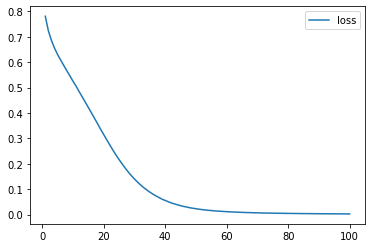

In [110]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df.plot(y="loss")

<AxesSubplot:>

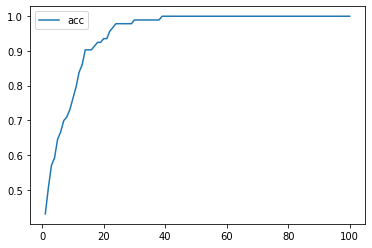

In [113]:
df = pd.DataFrame(model.history, index=range(1, len(model.history["acc"]) + 1))
# Plot the accuracy
df.plot(y="acc")

In [114]:
# Evaluate the model fit with linear dummy data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

32/32 - 0s - loss: 0.5292 - acc: 0.7500
Loss: 0.5292083024978638, Accuracy: 0.75


In [115]:
 # Making predictions
predictions = (nn.predict(X_test_scaled) > 0.5).astype("int32") 


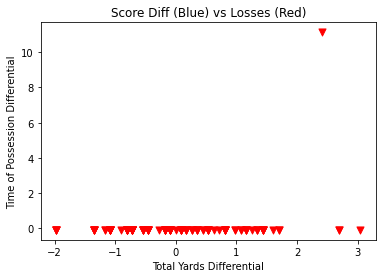

In [116]:
import matplotlib.pyplot as plt

ax = plt.figure().gca()

for i in range(X.shape[0]):
    marker = '^' if y[i] == 1 else 'v'
    color = 'g' if y[i] == 1 else 'r'
    ax.scatter(X[i,0], X[i,2], s=50, color=color, marker=marker)

ax.set_title("Score Diff (Blue) vs Losses (Red)")
ax.set_xlabel("Total Yards Differential")
ax.set_ylabel("Time of Possession Differential")

plt.show()